##Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

##Importações e Configurações Iniciais

In [1]:
import pandas as pd

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [3]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [4]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [5]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

##2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais. 

###2.1 Buscando dados

In [6]:
titulos = busca_titulos_tesouro_direto()

In [7]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                        Data Vencimento Data Base                      ...               
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23  ...        1827.87
                                                   2005-01-03               9.23  ...        1776.51
                                                   2005-01-04               9.26  ...        1777.32
                                                   2005-01-05               9.28  ...        1778.20
                                                   2005-01-06               9.31  ...        1779.01
...                                                                          ...  ...            ...
Tesouro Selic                      2027-03-01      2021-05-05               0.35  ...       10616.98
                                                   2021-05-06               0.35  ...       10617.13
                                                   2021-05-07               0.34  ...       10621.21
                                                   2021-05-10               0.34  ...       10622.89
                                                   2021-05-11               0.34  ...       10624.87

[115477 rows x 5 columns]

###2.2 Tesouro Selic

In [8]:
selic2025 = titulos.loc[('Tesouro Selic', '2025-03-01')]
selic2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
...,...,...,...,...,...
2021-05-05,0.33,0.34,10703.76,10699.69,10698.39
2021-05-06,0.33,0.34,10704.88,10700.80,10699.20
2021-05-07,0.33,0.34,10708.11,10704.03,10702.43


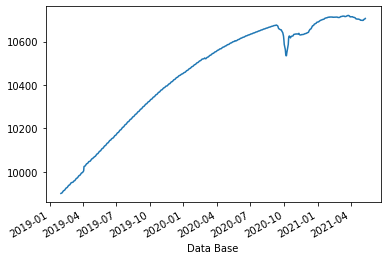

In [9]:
selic2025['PU Base Manha'].plot();

In [10]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06
2016-01-28,16.42,16.48,350.65,349.41,349.20
2016-01-29,15.93,15.99,361.21,359.92,359.71
2016-02-01,15.89,15.95,362.28,360.99,360.78
...,...,...,...,...,...
2021-05-05,6.72,6.84,897.73,896.06,895.82
2021-05-06,6.68,6.80,898.52,896.85,896.61
2021-05-07,6.84,6.96,896.53,894.87,894.63


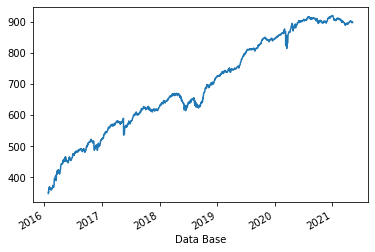

In [11]:
pre2023['PU Compra Manha'].plot();

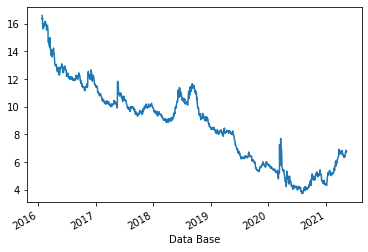

In [12]:
pre2023['Taxa Compra Manha'].plot();

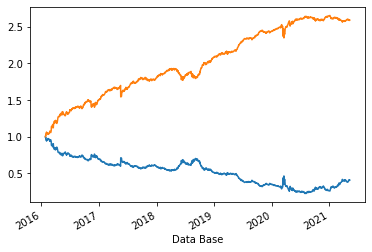

In [13]:
(pre2023['Taxa Compra Manha'] / pre2023['Taxa Compra Manha'].iloc[0]).plot();
(pre2023['PU Compra Manha'] / pre2023['PU Compra Manha'].iloc[0]).plot();

2.4 Pré-fixado 2026

In [14]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.36,6.48,696.02,691.42,691.25
2020-02-11,6.26,6.38,700.05,695.42,695.25
2020-02-12,6.22,6.34,701.76,697.13,696.96
2020-02-13,6.28,6.40,699.61,695.00,694.82
2020-02-14,6.23,6.35,701.71,697.08,696.91
...,...,...,...,...,...
2021-05-05,8.63,8.75,680.01,676.52,676.30
2021-05-06,8.55,8.67,682.57,679.07,678.85
2021-05-07,8.73,8.85,677.55,674.09,673.86


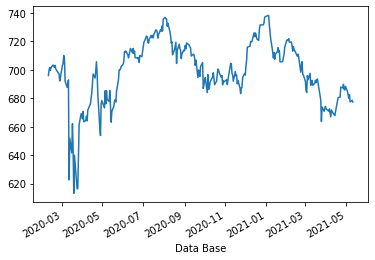

In [15]:
pre2026['PU Compra Manha'].plot();

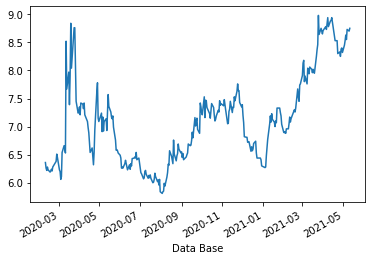

In [16]:
pre2026['Taxa Compra Manha'].plot();

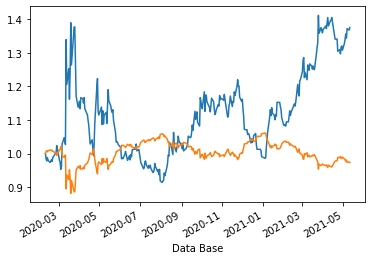

In [17]:
(pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot();
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot();

###2.5 Pré-fixado 2031 com Juros Semestrais

In [18]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2031-01-01')]
pre2031

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.69,6.81,1257.57,1247.33,1247.00
2020-02-11,6.57,6.69,1268.26,1257.90,1257.57
2020-02-12,6.56,6.68,1269.45,1259.08,1258.76
2020-02-13,6.64,6.76,1262.85,1252.56,1252.23
2020-02-14,6.56,6.68,1270.09,1259.73,1259.40
...,...,...,...,...,...
2021-05-05,9.28,9.40,1078.47,1071.02,1070.64
2021-05-06,9.21,9.33,1083.23,1075.74,1075.36
2021-05-07,9.37,9.49,1073.64,1066.24,1065.86


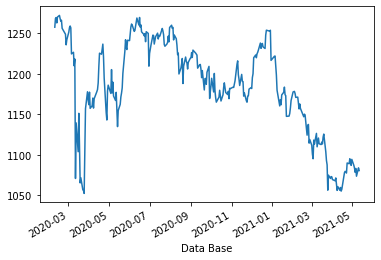

In [19]:
pre2031['PU Compra Manha'].plot();

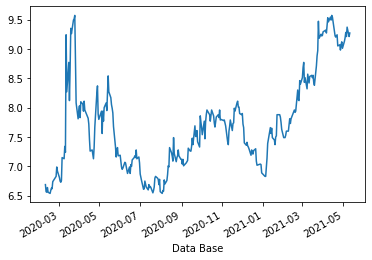

In [20]:
pre2031['Taxa Compra Manha'].plot();

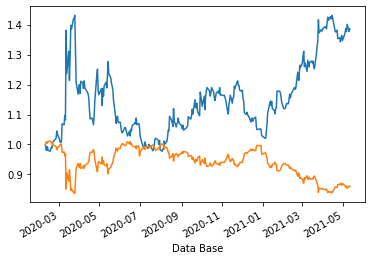

In [21]:
(pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot();
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot();

In [22]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,2.65,2.77,2785.55,2764.50,2764.01
2020-02-11,2.58,2.70,2798.39,2777.24,2776.76
2020-02-12,2.56,2.68,2802.40,2781.23,2780.75
2020-02-13,2.58,2.70,2799.33,2778.20,2777.72
2020-02-14,2.54,2.66,2807.15,2785.97,2785.22
...,...,...,...,...,...
2021-05-05,3.51,3.63,2935.89,2918.01,2917.31
2021-05-06,3.52,3.64,2935.08,2917.22,2916.52
2021-05-07,3.54,3.66,2933.35,2915.51,2914.25


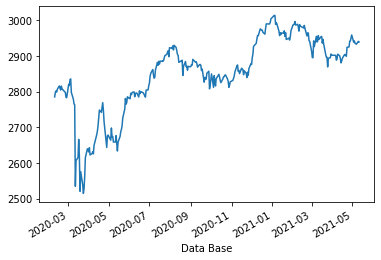

In [23]:
ipca2026['PU Compra Manha'].plot();

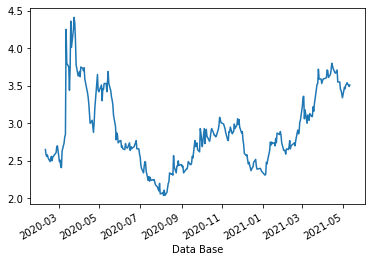

In [24]:
ipca2026['Taxa Compra Manha'].plot();

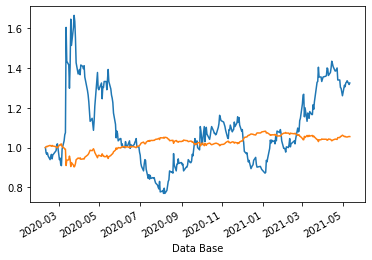

In [25]:
(ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot();
(ipca2026['PU Compra Manha'] / ipca2026['PU Compra Manha'].iloc[0]).plot();

###2.7 Tesouro IPCA+ 2035

In [26]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2010-03-08,6.23,6.33,415.52,405.82,405.61
2010-03-09,6.25,6.35,413.78,404.12,403.91
2010-03-10,6.25,6.35,413.99,404.33,404.12
2010-03-11,6.25,6.35,414.20,404.54,404.33
2010-03-12,6.27,6.37,412.69,403.07,402.82
...,...,...,...,...,...
2021-05-05,4.20,4.32,1981.34,1949.72,1949.20
2021-05-06,4.20,4.32,1981.86,1950.23,1949.72
2021-05-07,4.26,4.38,1966.87,1935.51,1934.62


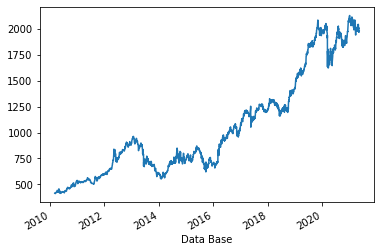

In [27]:
ipca2035['PU Compra Manha'].plot();

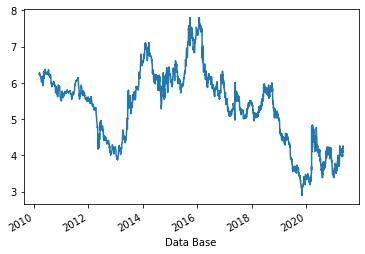

In [28]:
ipca2035['Taxa Compra Manha'].plot();

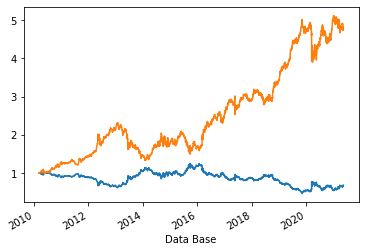

In [29]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot();
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot();

###2.8 Tesouro IPCA+ 2045

In [30]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2017-02-08,5.34,5.46,685.78,664.14,663.92
2017-02-09,5.27,5.39,698.96,676.90,676.67
2017-02-10,5.21,5.33,710.67,688.23,687.84
2017-02-13,5.21,5.33,710.90,688.46,688.23
2017-02-14,5.22,5.34,709.23,686.85,686.62
...,...,...,...,...,...
2021-05-05,4.20,4.32,1314.55,1278.81,1278.47
2021-05-06,4.20,4.32,1314.90,1279.15,1278.81
2021-05-07,4.26,4.38,1297.48,1262.23,1261.65


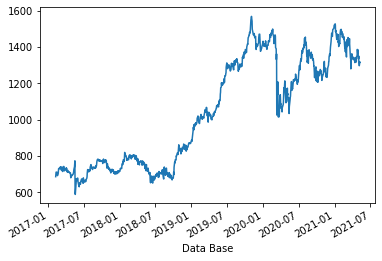

In [31]:
ipca2045['PU Compra Manha'].plot();

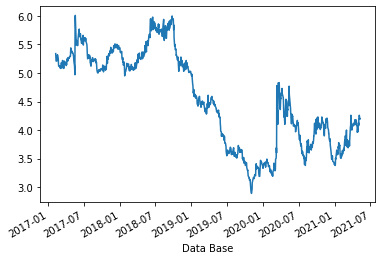

In [32]:
ipca2045['Taxa Compra Manha'].plot();

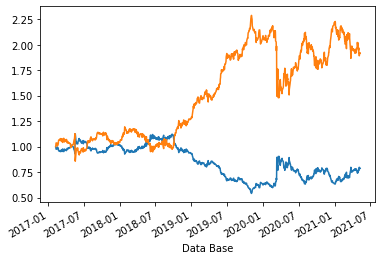

In [33]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot();
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot();

###2.9 Tesouro IPCA+ 2055 com Juros Semestrais

In [34]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,3.42,3.54,5063.37,4956.73,4955.71
2020-02-11,3.36,3.48,5119.00,5010.64,5009.63
2020-02-12,3.36,3.48,5120.02,5011.66,5010.64
2020-02-13,3.40,3.52,5084.54,4977.32,4976.30
2020-02-14,3.37,3.49,5113.38,5005.31,5003.81
...,...,...,...,...,...
2021-05-05,4.53,4.65,4506.75,4422.89,4421.67
2021-05-06,4.55,4.67,4493.83,4410.38,4409.16
2021-05-07,4.61,4.73,4453.88,4371.63,4369.57


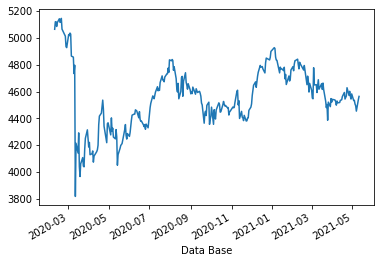

In [35]:
ipca2055['PU Compra Manha'].plot();

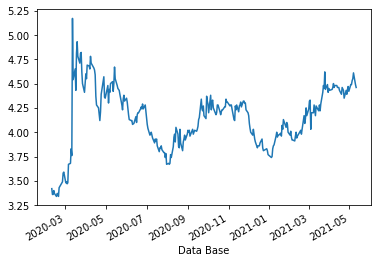

In [36]:
ipca2055['Taxa Compra Manha'].plot();

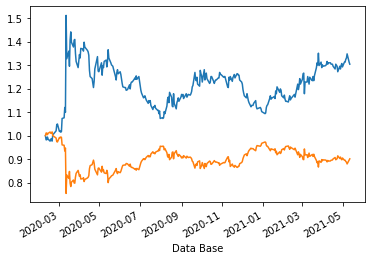

In [37]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot();
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot();

##3. Vendas Tesouro Direto


###3.1 Buscando Dados

In [38]:
vendas = busca_vendas_tesouro()

In [39]:
vendas.sort_index(inplace=True)
vendas

PU  ...        Valor
Tipo Titulo                        Vencimento do Titulo Data Venda                ...             
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07   1038.150000  ...      7682.31
                                                        2002-01-08   1035.590000  ...      6213.54
                                                        2002-01-09   1035.400000  ...       207.08
                                                        2002-01-14   1038.166666  ...       622.89
                                                        2002-01-15   1038.640000  ...      1038.64
...                                                                          ...  ...          ...
Tesouro Selic                      2027-03-01           2021-05-04  10621.358586  ...  17223170.22
                                                        2021-05-05  10623.102708  ...  14933214.16
                                                        2021-05-06  10624.412377  ...  19482834.92
                                                        2021-05-07  10624.858950  ...  19359130.49
                                                        2021-05-10  10628.927888  ...  20462918.25

[65454 rows x 3 columns]

###3.2 Gráficos

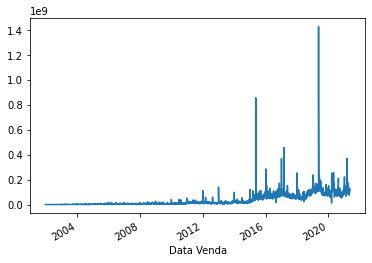

In [40]:
vendas['Valor'].groupby('Data Venda').sum().plot();

##4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

###4.1 Buscando Dados

In [41]:
recompras = busca_recompras_tesouro()

In [42]:
recompras.sort_index(inplace=True)
recompras

Quantidade       Valor
Tipo Titulo                        Vencimento do Titulo Data Resgate                        
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00     3545.04
                                                        2005-02-03          1.00     1783.97
                                                        2005-03-03          2.00     3595.96
                                                        2005-03-10          1.00     1803.81
                                                        2005-03-24          0.20      364.14
...                                                                          ...         ...
Tesouro Selic                      2027-03-01           2021-05-04        432.87  4595011.28
                                                        2021-05-05        404.82  4297957.65
                                                        2021-05-06        253.91  2696085.40
                                                        2021-05-07        304.06  3228728.27
                                                        2021-05-10        255.54  2714550.75

[44509 rows x 2 columns]

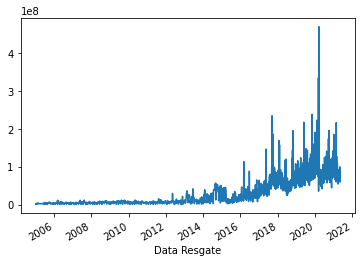

In [43]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

###4.2 Recompras diárias Tesouro Selic 2025


In [44]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [45]:
recompras_selic

,Quantidade,Valor
Data Resgate,,
2019-02-06,14.00,138709.86
2019-02-07,52.17,517021.46
2019-02-08,22.72,225218.42
2019-02-11,87.31,865700.65
2019-02-12,126.61,1255681.15
...,...,...
2021-05-04,2973.22,31812847.46
2021-05-05,2120.17,22683880.72
2021-05-06,2044.70,21877647.47
